Considering we have ~60 Tm measurements, it's not really enough to do machine learning anyway. However, if we make 100 models of each mutant, we have effecitively 100 times more data. Let's try it. 

In [71]:
import pandas 

feature_set = pandas.read_csv( '/Users/alex/Documents/bagel-benchmark/data_sets/calculated/enzyme_design_talaris_2014.csv', index_col=0 )
data_set = pandas.read_csv( 'data_sets/thermo_paper_data_set.csv', index_col=0 )

my_data = data_set[ [ 'tm' ] ] 
my_features = feature_set.drop( 'description', axis=1 ).copy()
my_features = my_features.groupby( 'name' ).apply( lambda x: x.mean() ) 
#my_features = my_features.set_index( 'name' ).copy()
my_joined = my_data.join( my_features ).dropna()

y = my_joined.tm
X = my_joined.drop( 'tm' ).copy() 

print X.shape
print y.shape

(61, 60)
(61,)


In [80]:
my_joined.corr()[ 'tm' ].copy().sort_values()

SR_5_fa_rep             -0.269947
tot_total_charge        -0.259443
SR_2_burunsat_pm        -0.230642
SR_2_hbond_pm           -0.206172
SR_2_fa_rep             -0.194053
SR_2_pstat_pm           -0.190822
SR_4_pstat_pm           -0.184832
tot_total_pos_charges   -0.178178
all_cst                 -0.137218
SR_2_nlpstat_pm         -0.135882
SR_1_pstat_pm           -0.127601
SR_3_pstat_pm           -0.127601
SR_4_burunsat_pm        -0.118083
tot_hbond_pm            -0.105519
SR_4_nlpstat_pm         -0.097668
tot_burunsat_pm         -0.084361
SR_3_burunsat_pm        -0.077152
SR_1_burunsat_pm        -0.077152
SR_1_nlpstat_pm         -0.068310
SR_3_nlpstat_pm         -0.068310
SR_4_fa_rep             -0.058818
tot_pstat_pm            -0.057370
SR_5_dsasa_1_2          -0.038474
hbond_sc                -0.036529
SR_5_all_cst            -0.035383
SR_5_hbond_sc           -0.030687
tot_nlpstat_pm          -0.007467
SR_5_total_score        -0.006558
SR_5_interf_E_1_2       -0.006479
SR_3_fa_rep   

In [72]:
from sklearn import cross_validation, linear_model, pipeline, preprocessing, grid_search

pln = pipeline.Pipeline([
    ( 'scaler', preprocessing.StandardScaler() ),
    ( 'en', linear_model.ElasticNetCV() ), 
])

param_grid = {
    #'en__l1_ratio': [ .1, .5, .7, .9, .93, .99 ] 
}

grids = grid_search.GridSearchCV( pln, param_grid, cv=10 ) 
preds = cross_validation.cross_val_predict( grids, X, y ) 
scores = cross_validation.cross_val_score( grids, X, y ) 
print scores.mean(), 'mean score' 

0.999992669716 mean score


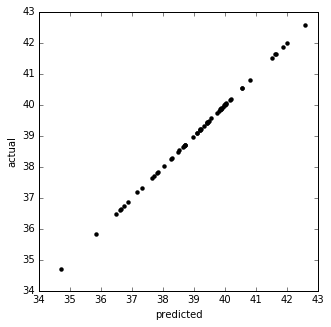

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.figure( figsize=( 5,5 ) ) 
plt.xlabel( 'predicted' )
plt.ylabel( 'actual' ) 
plt.scatter( preds, y, lw=0, color='k' ) 